# Extracting elbow angle and emg data

In [1]:
import pandas as pd
import numpy as np
import os
from signal_extraction import *

In [2]:
subject_names=os.listdir(BASE_DATA_DIR)
subject_names

['Abhoy', 'Alok', 'Tushar']

In [3]:
subject_name='abhoy'
file_index=1

data=read_xsens_data(subject_name,file_index)

data

array([ 1.89721847,  1.94297329,  1.98866801, ..., -1.22832351,
       -1.084201  , -0.91481608])

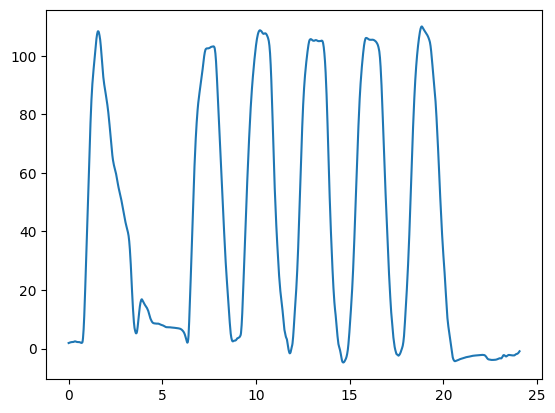

In [4]:
import matplotlib.pyplot as plt

t=np.linspace(0,(len(data)-1)/60,len(data))
plt.plot(t,data)

# Store the angle values after extraction

In [3]:
import os
import numpy as np

sampling_rate=60
for subject_name in subject_names:
    file_indices=range(0,10)
    for file_index in file_indices:
        file_folder=f'{file_index}'
        if file_index==0:
            file_folder='MVC'

        save_path=f'{BASE_EXTRACTION_PATH}/{subject_name}/{file_folder}/Elbow_Angle_Data/'
        os.makedirs(save_path,exist_ok=True)

        angle=read_xsens_data(subject_name, file_index)

        data_angle={'time':np.linspace(0,(len(angle)-1)/sampling_rate, len(angle)),
            'angle':angle}
        
        pd.DataFrame(data_angle).to_csv(f'{save_path}/angle.csv', index=False)

NameError: name 'subject_names' is not defined

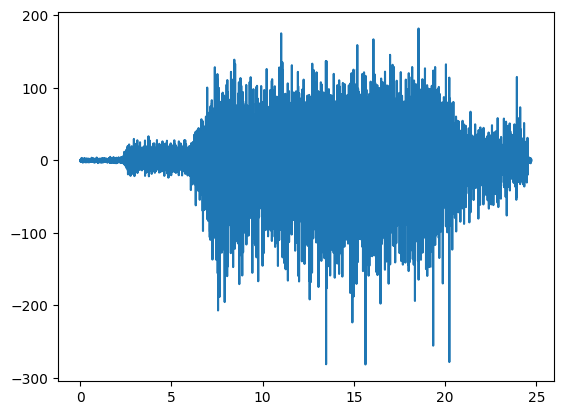

In [6]:
emg_signals=read_emg_data(subject_name, file_index)

muscle_index=1
t_emg=np.linspace(0,(len(emg_signals[muscle_index])-1)/2000,len(emg_signals[muscle_index]))
plt.plot(t_emg,emg_signals[muscle_index])

# Extract and Store the EMG Signals

In [3]:
import os
from data_proc import EMG_Processor

sampling_rate=2000
proc=EMG_Processor(sampling_rate, 20, 500, 0.3)


for subject_name in subject_names:
    file_indices=range(0,10)
    for file_index in file_indices:
        file_folder=f'{file_index}'
        if file_index==0:
            file_folder='MVC'

        save_path=f'{BASE_EXTRACTION_PATH}/{subject_name}/{file_folder}/EMG_Data/'
        os.makedirs(save_path,exist_ok=True)

        emg_signals=read_emg_data(subject_name,file_index)
        for i in range(len(emg_signals)):
            data={'time':np.linspace(0,(len(emg_signals[i])-1)/sampling_rate,len(emg_signals[i])),
                'raw':emg_signals[i], 'processed':proc.processed_signal(emg_signals[i])}
            
            pd.DataFrame(data).to_csv(f"{save_path}/sig_{i+1}.csv", index=False)
            

    

# Combine the angle and emg data and store

In [5]:
import os
from scipy.interpolate import interp1d

subject_names=os.listdir(BASE_EXTRACTION_PATH)
print(subject_names)

for subject_name in subject_names:
    file_indices=range(0,10)

    for file_index in file_indices:
        file_folder=f'{file_index}'
        if file_index==0:
            file_folder='MVC'

        angle_path=f'{BASE_EXTRACTION_PATH}/{subject_name}/{file_folder}/Elbow_Angle_Data'
        emg_path=f'{BASE_EXTRACTION_PATH}/{subject_name}/{file_folder}/EMG_Data'
        save_path=f'{BASE_EXTRACTION_PATH}/{subject_name}/{file_folder}/COMBINED'

        os.makedirs(save_path,exist_ok=True)
        
        angle=pd.read_csv(f'{angle_path}/angle.csv')['angle']
        emg_signals=[]
        
        for i in range(9):
            emg=pd.read_csv(f'{emg_path}/sig_{i+1}.csv')
            emg_signals.append(emg['processed'])
            if i==0:
                t=emg['time']

        angle_t=np.linspace(0,1,len(angle))
        intp=interp1d(angle_t, angle)
        angle_new_t=np.linspace(0,1,len(emg_signals[0]))
        angle_new=intp(angle_new_t)

        combined_df={'time':t,
                     'elbow_angle':angle_new,
                    }
        
        for i in range(9):
            combined_df.update({f'emg_mus_{i+1}':emg_signals[i]})

        pd.DataFrame(combined_df).to_csv(f'{save_path}/angle_emg.csv', index=False)
    


['Abhoy', 'Alok', 'Tushar']


# Read Data from Storage

In [2]:
import matplotlib.pyplot as plt

%matplotlib qt

t, angle, emgs=read_extracted_combined_data('Tushar')



plot_muscles=[1,2,3,4]

plt.subplot(len(plot_muscles)+1,1,1)
plt.plot(t,angle)
plt.legend(['Angle'])
plt.xlabel('Time')

for i in range(len(plot_muscles)):
    plt.subplot(len(plot_muscles)+1,1,i+2)
    plt.ylim(-0.1,1)
    plt.plot(t,emgs[plot_muscles[i]-1])


In [10]:
elbow_angle=angle
plt.plot(elbow_angle)


flex_ex_sig=generate_classifier_signal(elbow_angle)

plt.plot(flex_ex_sig*25)



NameError: name 'angle' is not defined

In [ ]:
from mlutils import *

subject_names=os.listdir(BASE_EXTRACTION_PATH)
print(subject_names)

for sub in subject_names:
    for f in range(1,10):
        t, ang, emg_s=read_extracted_combined_data(sub,f)

        class_sig=generate_classifier_signal(ang)

        mus_imgs=generate_classified_muscle_images(class_sig, emg_s, [1,2,3], window_duration=0.25, num_examples=200)
        save_muscle_images(sub, f,mus_imgs)



['Abhoy', 'Alok', 'Tushar']












































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































